## Exploratory Data Analysis (EDA) — KAIM_WEEK1
This notebook runs the EDA using the modular class-based components


### setup path & imports

In [1]:
# Ensure src/ is importable
import sys, os
project_root = os.path.abspath(os.path.join(".."))  # notebooks/ is under project root
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

# Import loaders & EDA classes
from src.data_loader import DataLoader
from src.eda.eda_descriptive import EDA_Descriptive
from src.eda.eda_text import EDA_Text
from src.eda.eda_time_series import EDA_TimeSeries
from src.eda.eda_publisher import EDA_Publisher

# standard libs
import pandas as pd


### load data

In [3]:
DATA_PATH = "../data/newsData/raw_analyst_ratings.csv"
loader = DataLoader(DATA_PATH)
df = loader.load_news_data() 
print("Rows:", len(df))
df.head(5)

Rows: 1407328


,Unnamed: 0,headline,url,publisher,date,stock,headline_len,date_only,hour_utc,hour_est,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,14,10,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,14,10,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,8,4,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,16,12,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,15,11,Friday


### 1) Descriptive statistics & basic plots
Headline length distribution, top publishers, and time-of-day patterns.


Headline Length Statistics:
count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline_len, dtype: float64


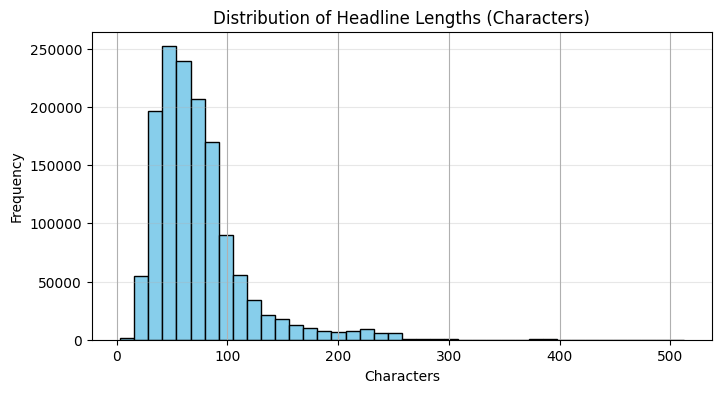

Headline Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64


In [10]:
#  statistics for textual lengths
headline_stats = EDA_Descriptive.headline_length_stats(df) 
print("Headline Stats:")
print(headline_stats)


 Top 15 Publishers (out of 315 unique):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64


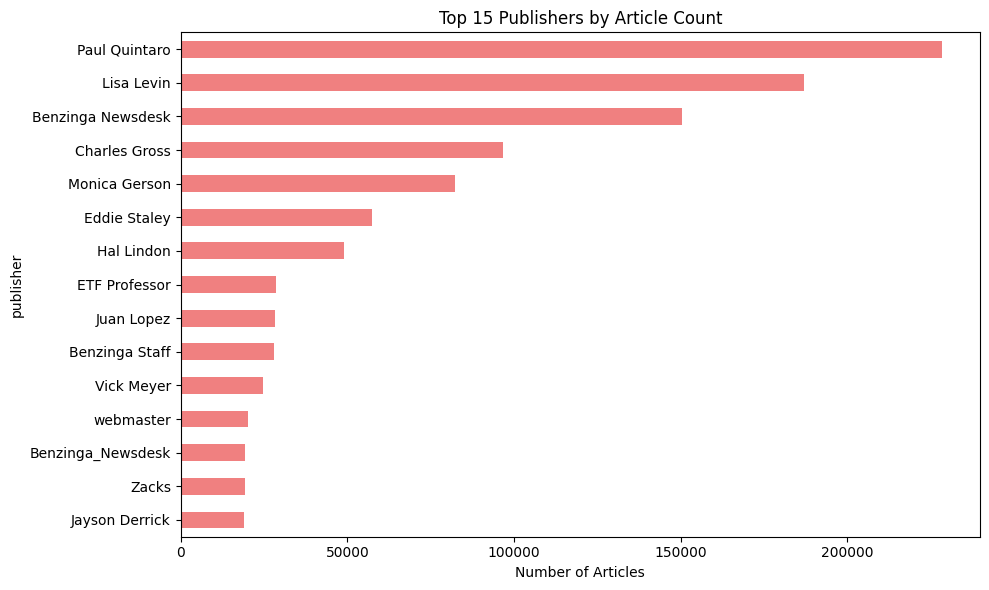


Publisher Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [11]:
# Identify which publishers are most active
publisher_counts = EDA_Descriptive.publisher_activity(df)
print("\nPublisher Counts:")
print(publisher_counts.head(5))

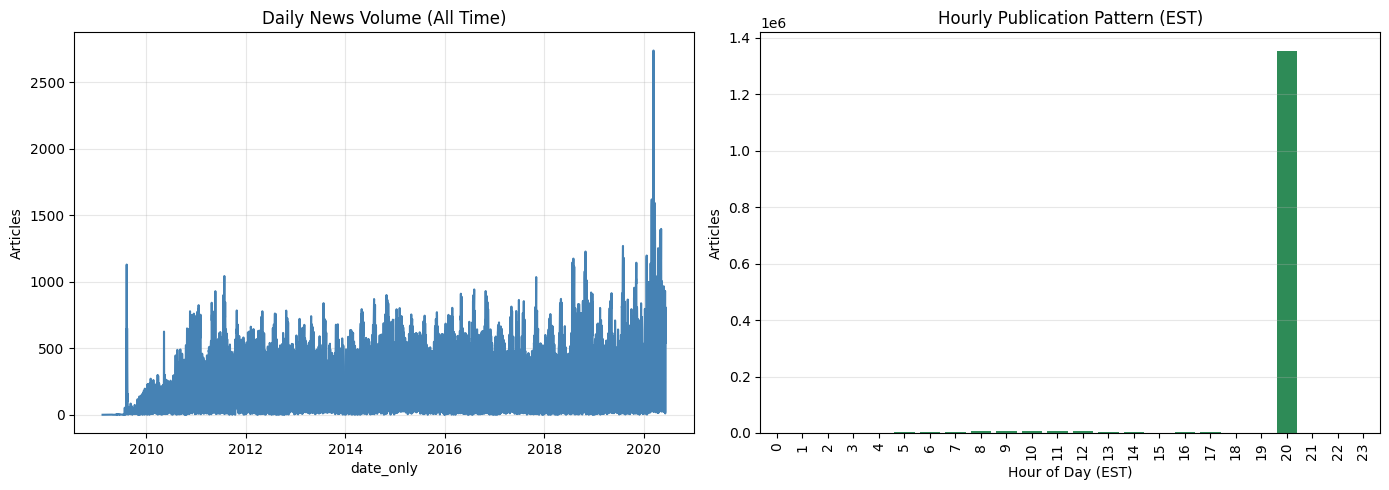

In [13]:
# see trends over time
daily_vol, hourly_pattern = EDA_Descriptive.time_patterns(df)

### Text Analysis(Topic Modeling):

In [18]:
text_analyzer = EDA_Text(df)
print("EDA_Text analyzer instantiated.")

EDA_Text analyzer instantiated.


In [22]:
# extracting common keywords or phrases
top_general = text_analyzer.get_top_keywords_and_phrases(top_n=15)
print("Top 15 Keywords + Phrases:")
print(top_general)

#  extracting topics or significant events (e.g., price target, FDA approval)
top_signals = text_analyzer.get_top_signals_only(top_n=15)
print("Top 15 Targeted Bigram Signals (Events/Phrases):")
print(top_signals)

Top 15 General N-grams (Keywords + Phrases):
           phrase   count
239438     stocks  161776
94862         est  140632
93691         eps  128897
153289     market  120559
227549     shares  114313
205550    reports  108710
260794     update   91722
88040    earnings   87399
215882      sales   79645
39856    benzinga   74510
271586       week   69572
27726   announces   66591
191444      price   64406
47833         buy   64371
158571        mid   62263
Top 15 Targeted Bigram Signals (Events/Phrases):
                    phrase  count
78614              eps est  61227
175395         reports eps  51212
162889        price target  47274
205859       stocks moving  40044
134349             mid day  37324
130423       market update  33101
74196   earnings scheduled  32055
111764  initiates coverage  28996
161473          pre market  28394
51927    companies trading  23170
218724      trading higher  22947
130326      market session  22428
13955              adj eps  21722
32049    benzi

 Word cloud saved: reports/figures/wordcloud.png


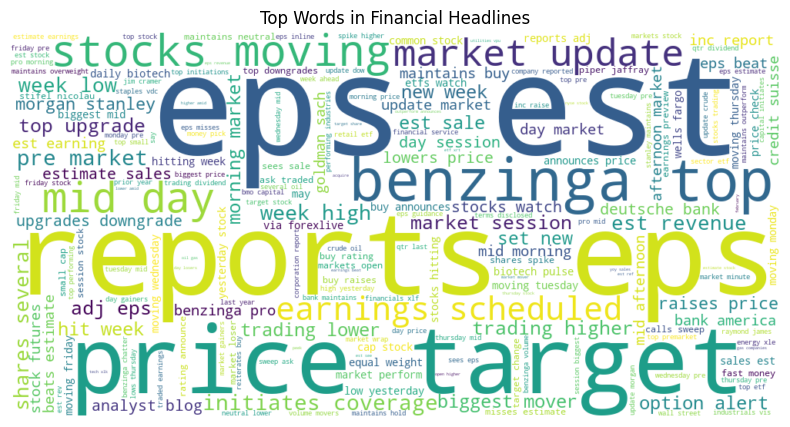

In [23]:
# plot word cloud
text_analyzer.plot_wordcloud()

# Save and Display Word Cloud
from IPython.display import Image
Image(filename="reports/figures/wordcloud.png", width=800)

### Time Series Analysis:

In [24]:
# Instantiate the class once
ts_analyzer = EDA_TimeSeries(df) 
print("EDA_TimeSeries analyzer instantiated.")

EDA_TimeSeries analyzer instantiated.


 1. Daily Volume + Spikes

 Top 5 Highest-Volume Days:
  2020-03-12 â†’ 2,739 articles
  2020-02-28 â†’ 1,620 articles
  2020-03-19 â†’ 1,595 articles
  2020-02-27 â†’ 1,567 articles
  2020-03-06 â†’ 1,428 articles


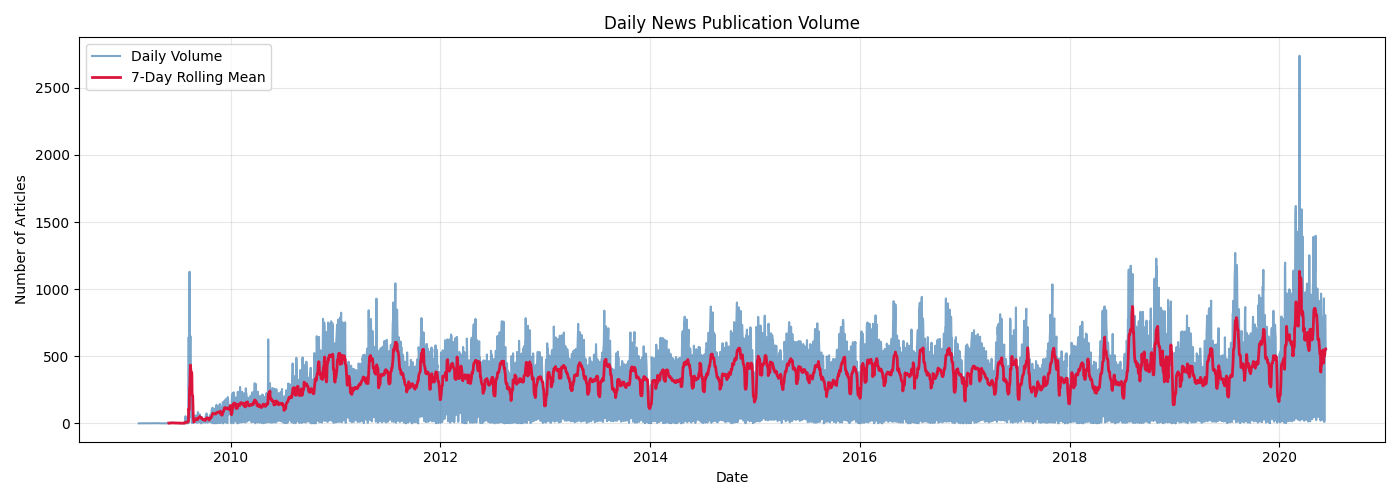

In [29]:
# How does the publication frequency vary over time?
daily_counts = ts_analyzer.daily_volume_analysis()

# Display saved plots in the notebook
display(Image(filename="reports/figures/daily_volume_analysis.png"))

2. Hourly Pattern (EST)

 Peak publishing hour: 20:00 EST (1,351,472 articles)
  â†’ Likely aligned with market open (9:30 AM EST)


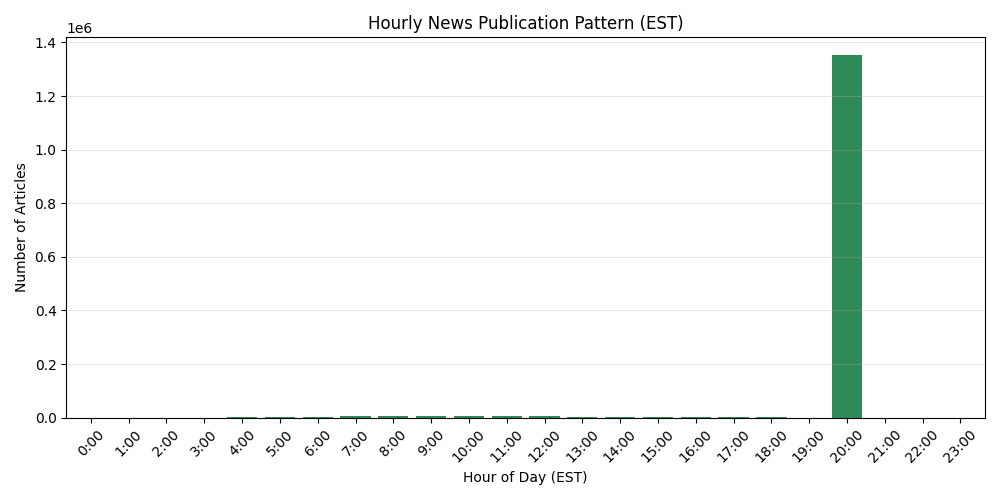

In [30]:
# Analysis of publishing times for traders
ts_analyzer.hourly_pattern_analysis()

# Display saved plots in the notebook
display(Image(filename="reports/figures/hourly_pattern_analysis.png")) 

3. Weekday Pattern

 Weekend (Sat+Sun) share: 1.7% of total news.


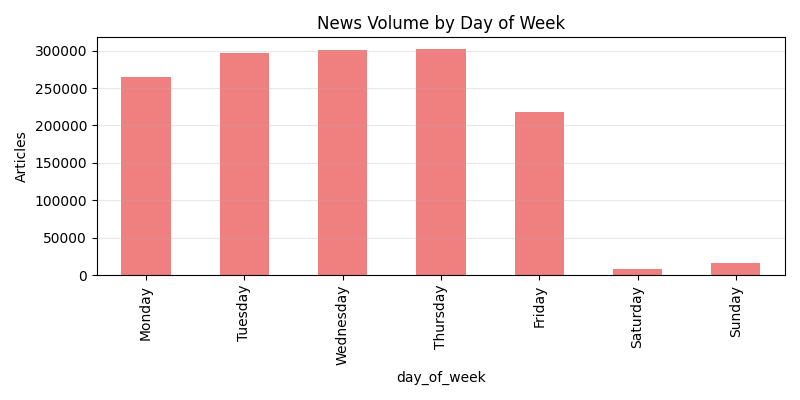

In [33]:
ts_analyzer.weekday_analysis()

# Display saved plots in the notebook
display(Image(filename="reports/figures/weekday_analysis.png"))

4. Market Event Alignment

In [28]:
# Are there spikes in article publications related to specific market events?
event_map = ts_analyzer.align_with_market_events()


 News Volume on Key Market Event Days:
--------------------------------------------------
2020-03-23 |  1391 articles | Fed $2T Stimulus Announcement
2020-06-10 |   807 articles | Fed Holds Rates, QE Extended
2020-08-27 |     0 articles | Powell: Avg Inflation Targeting
2020-11-09 |     0 articles | Pfizer Vaccine Efficacy (90%)
2021-01-27 |     0 articles | Fed Meeting (Post-GameStop Volatility)
2021-03-17 |     0 articles | Fed Raises Dot Plot, Yields Spike

 High-impact events (volume > 919 articles):
  â†’ 2020-03-23: Fed $2T Stimulus Announcement


### Publisher Analysis:

In [34]:
# Instantiate the class
eda_pub = EDA_Publisher(df)

 Top Publishers and Domains Analysis:

In [35]:
pub_counts, domain_counts = eda_pub.top_publishers_analysis(top_n=5)
print("\nTop 5 Raw Publisher Counts:")
print(pub_counts.to_string())
# Show the plot
display(Image(filename="reports/figures/top_publisher_analysis_raw.png"))

 'publisher_domain' column added.
 Top raw publishers plot saved: reports/figures/top_publisher_analysis_raw.png
 Top domains plot saved: reports/figures/top_publisher_analysis_domains.png

Top 5 Raw Publisher Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380


Top 5 Domain/Organization Counts:

publisher_domain
paul quintaro        228373
lisa levin           186979
benzinga newsdesk    150484
charles gross         96732
monica gerson         82380


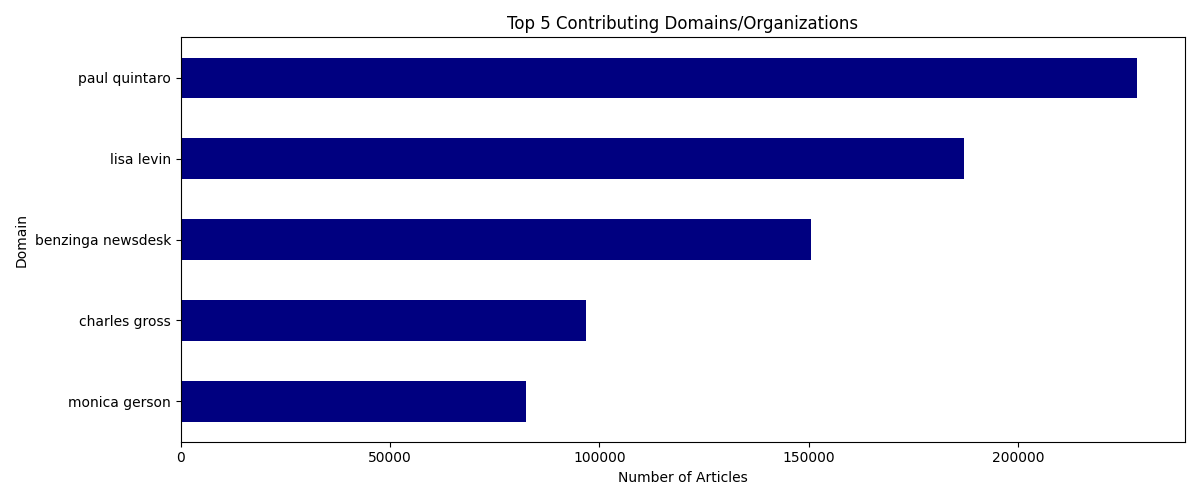

In [36]:
print(domain_counts.to_string())
# Show the plot
display(Image(filename="reports/figures/top_publisher_analysis_domains.png"))

Content Difference by Publisher Domain:

 Publisher content difference plot saved: reports/figures/publisher_content_analysis.png

 Content Difference Summary (Simulated by Headline Length):
--------------------------------------------------
 publisher_domain       mean  median       std
benzinga newsdesk 114.650508    94.0 63.449069
    charles gross  80.999328    77.0 33.702161
       lisa levin  47.502998    42.0 20.355364
    monica gerson  51.002950    43.0 23.366659
    paul quintaro  84.347839    78.0 35.722411

 Deeper Content Hint (Top 3 Words for Largest Publisher):
 Largest Domain (benzinga newsdesk) Top Words: STOCK, MARKET, NEWS


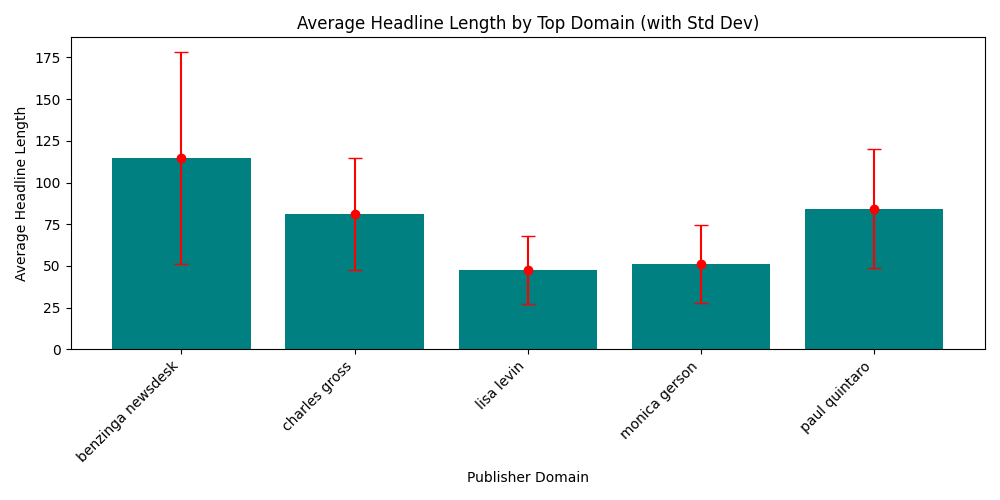

In [37]:
content_summary = eda_pub.publisher_content_analysis(top_n_domains=5)
# Show the plot
display(Image(filename="reports/figures/publisher_content_analysis.png"))